In [67]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
sns.set_style('whitegrid')

## 四分位範囲外れ値関数

In [68]:
def outlier_iqr(mrkR):

    for i in range(len(mrk.columns)):

        # 列を抽出する
        col = mrkR.iloc[:,i]

        # 四分位数
        q1 = col.describe()['25%']
        q3 = col.describe()['75%']
        iqr = q3 - q1 #四分位範囲

        # 外れ値の基準点
        outlier_min = q1 - (iqr) * 1.5
        outlier_max = q3 + (iqr) * 1.5

        # 範囲から外れている値を除く
        col[col < outlier_min] = None
        col[col > outlier_max] = None

    return mrkR

## Load Dateset

In [69]:
mrk = pd.read_csv("marketing.csv")
mrk.shape

(8994, 14)

In [70]:
mrk.head(n=102)

,Sex,MaritalStatus,Age,Education,Occupation,YearsInSf,DualIncome,HouseholdMembers,Under18,HouseholdStatus,TypeOfHome,EthnicClass,Language,Income
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,1,5.0,4,5,5,3.0,3,0.0,1,1,7,?,9.0
2,1.0,1,5.0,5,5,5,3.0,5,2.0,1,1,7,1,9.0
3,2.0,1,3.0,5,1,5,2.0,3,1.0,2,3,7,1,9.0
4,2.0,5,1.0,2,6,5,1.0,4,2.0,3,1,7,1,1.0
5,2.0,5,1.0,2,6,3,1.0,4,2.0,3,1,7,1,1.0
6,1.0,1,6.0,4,8,5,3.0,2,0.0,1,1,7,1,8.0
7,1.0,5,2.0,3,9,4,1.0,3,1.0,2,3,7,1,1.0
8,1.0,3,3.0,4,3,5,1.0,1,0.0,2,3,7,1,6.0
9,1.0,1,6.0,3,8,5,3.0,3,0.0,2,3,7,1,2.0


In [71]:
mrk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8994 entries, 0 to 8993
Data columns (total 14 columns):
Sex                 8993 non-null float64
MaritalStatus       8993 non-null object
Age                 8993 non-null float64
Education           8993 non-null object
Occupation          8993 non-null object
YearsInSf           8993 non-null object
DualIncome          8993 non-null float64
HouseholdMembers    8993 non-null object
Under18             8993 non-null float64
HouseholdStatus     8993 non-null object
TypeOfHome          8993 non-null object
EthnicClass         8993 non-null object
Language            8993 non-null object
Income              8993 non-null float64
dtypes: float64(5), object(9)
memory usage: 983.8+ KB


In [72]:
mrkR=mrk.replace({'?':pd.np.nan,'0':0,'1':1,'2':2,'3':3,'4':4,'5':5,'6':6,'7':7,'8':8,'9':9})

In [73]:
mrkR.head(n=102)

,Sex,MaritalStatus,Age,Education,Occupation,YearsInSf,DualIncome,HouseholdMembers,Under18,HouseholdStatus,TypeOfHome,EthnicClass,Language,Income
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,1.0,5.0,4.0,5.0,5.0,3.0,3.0,0.0,1.0,1.0,7.0,NaN,9.0
2,1.0,1.0,5.0,5.0,5.0,5.0,3.0,5.0,2.0,1.0,1.0,7.0,1.0,9.0
3,2.0,1.0,3.0,5.0,1.0,5.0,2.0,3.0,1.0,2.0,3.0,7.0,1.0,9.0
4,2.0,5.0,1.0,2.0,6.0,5.0,1.0,4.0,2.0,3.0,1.0,7.0,1.0,1.0
5,2.0,5.0,1.0,2.0,6.0,3.0,1.0,4.0,2.0,3.0,1.0,7.0,1.0,1.0
6,1.0,1.0,6.0,4.0,8.0,5.0,3.0,2.0,0.0,1.0,1.0,7.0,1.0,8.0
7,1.0,5.0,2.0,3.0,9.0,4.0,1.0,3.0,1.0,2.0,3.0,7.0,1.0,1.0
8,1.0,3.0,3.0,4.0,3.0,5.0,1.0,1.0,0.0,2.0,3.0,7.0,1.0,6.0
9,1.0,1.0,6.0,3.0,8.0,5.0,3.0,3.0,0.0,2.0,3.0,7.0,1.0,2.0


In [74]:
mrkR.isnull().any(axis=0)

Sex                 True
MaritalStatus       True
Age                 True
Education           True
Occupation          True
YearsInSf           True
DualIncome          True
HouseholdMembers    True
Under18             True
HouseholdStatus     True
TypeOfHome          True
EthnicClass         True
Language            True
Income              True
dtype: bool

In [75]:
outlier_iqr(mrkR)

,Sex,MaritalStatus,Age,Education,Occupation,YearsInSf,DualIncome,HouseholdMembers,Under18,HouseholdStatus,TypeOfHome,EthnicClass,Language,Income
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,1.0,5.0,4.0,5.0,5.0,3.0,3.0,0.0,1.0,1.0,7.0,NaN,9.0
2,1.0,1.0,5.0,5.0,5.0,5.0,3.0,5.0,2.0,1.0,1.0,7.0,1.0,9.0
3,2.0,1.0,3.0,5.0,1.0,5.0,2.0,3.0,1.0,2.0,3.0,7.0,1.0,9.0
4,2.0,5.0,1.0,2.0,6.0,5.0,1.0,4.0,2.0,3.0,1.0,7.0,1.0,1.0
5,2.0,5.0,1.0,2.0,6.0,3.0,1.0,4.0,2.0,3.0,1.0,7.0,1.0,1.0
6,1.0,1.0,6.0,4.0,8.0,5.0,3.0,2.0,0.0,1.0,1.0,7.0,1.0,8.0
7,1.0,5.0,2.0,3.0,9.0,4.0,1.0,3.0,1.0,2.0,3.0,7.0,1.0,1.0
8,1.0,3.0,3.0,4.0,3.0,5.0,1.0,1.0,0.0,2.0,3.0,7.0,1.0,6.0
9,1.0,1.0,6.0,3.0,8.0,5.0,3.0,3.0,0.0,2.0,3.0,7.0,1.0,2.0


In [77]:
mrkR["Sex"] = mrkR["Sex"].fillna(mrkR["Sex"].mean())
mrkR["MaritalStatus"] = mrkR["MaritalStatus"].fillna(mrkR["MaritalStatus"].mean())
mrkR["Age"] = mrkR["Age"].fillna(mrkR["Age"].mean())
mrkR["Education"] = mrkR["Education"].fillna(mrkR["Education"].mean())
mrkR["Occupation"] = mrkR["Occupation"].fillna(mrkR["Occupation"].mean())
mrkR["YearsInSf"] = mrkR["YearsInSf"].fillna(mrkR["YearsInSf"].mean())
mrkR["DualIncome"] = mrkR["DualIncome"].fillna(mrkR["DualIncome"].mean())
mrkR["HouseholdMembers"] = mrkR["HouseholdMembers"].fillna(mrkR["HouseholdMembers"].mean())
mrkR["Under18"] = mrkR["Under18"].fillna(mrkR["Under18"].mean())
mrkR["HouseholdStatus"] = mrkR["HouseholdStatus"].fillna(mrkR["HouseholdStatus"].mean())
mrkR["TypeOfHome"] = mrkR["TypeOfHome"].fillna(mrkR["TypeOfHome"].mean())
mrkR["EthnicClass"] = mrkR["EthnicClass"].fillna(mrkR["EthnicClass"].mean())
mrkR["Language"] = mrkR["Language"].fillna(mrkR["Language"].mean())
mrkR["Income"] = mrkR["Income"].fillna(mrkR["Income"].mean())

In [78]:
mrkR.head(n=50)

,Sex,MaritalStatus,Age,Education,Occupation,YearsInSf,DualIncome,HouseholdMembers,Under18,HouseholdStatus,TypeOfHome,EthnicClass,Language,Income
0,1.54687,3.03102,3.415212,3.835074,3.787964,4.664303,1.544757,2.780376,0.453808,1.836742,1.85572,6.04057,1.0,4.895029
1,2.00000,1.00000,5.000000,4.000000,5.000000,5.000000,3.000000,3.000000,0.000000,1.000000,1.00000,7.00000,1.0,9.000000
2,1.00000,1.00000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,2.000000,1.000000,1.00000,7.00000,1.0,9.000000
3,2.00000,1.00000,3.000000,5.000000,1.000000,5.000000,2.000000,3.000000,1.000000,2.000000,3.00000,7.00000,1.0,9.000000
4,2.00000,5.00000,1.000000,2.000000,6.000000,5.000000,1.000000,4.000000,2.000000,3.000000,1.00000,7.00000,1.0,1.000000
5,2.00000,5.00000,1.000000,2.000000,6.000000,3.000000,1.000000,4.000000,2.000000,3.000000,1.00000,7.00000,1.0,1.000000
6,1.00000,1.00000,6.000000,4.000000,8.000000,5.000000,3.000000,2.000000,0.000000,1.000000,1.00000,7.00000,1.0,8.000000
7,1.00000,5.00000,2.000000,3.000000,9.000000,4.000000,1.000000,3.000000,1.000000,2.000000,3.00000,7.00000,1.0,1.000000
8,1.00000,3.00000,3.000000,4.000000,3.000000,5.000000,1.000000,1.000000,0.000000,2.000000,3.00000,7.00000,1.0,6.000000
9,1.00000,1.00000,6.000000,3.000000,8.000000,5.000000,3.000000,3.000000,0.000000,2.000000,3.00000,7.00000,1.0,2.000000


In [79]:
y = mrkR[mrkR.columns[13]]

In [80]:
X = mrkR.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12]]

In [81]:
X.describe()

,Sex,MaritalStatus,Age,Education,Occupation,YearsInSf,DualIncome,HouseholdMembers,Under18,HouseholdStatus,TypeOfHome,EthnicClass,Language
count,8994.000000,8994.000000,8994.000000,8994.000000,8994.000000,8994.000000,8994.000000,8994.000000,8994.000000,8994.000000,8994.000000,8994.000000,8994.0
mean,1.546870,3.031020,3.415212,3.835074,3.787964,4.664303,1.544757,2.780376,0.453808,1.836742,1.855720,6.040570,1.0
std,0.497798,1.793073,1.637490,1.236367,2.525260,0.566033,0.739524,1.368195,0.697299,0.734354,1.122252,1.627544,0.0
min,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.0
25%,1.000000,1.000000,2.000000,3.000000,1.000000,4.664303,1.000000,2.000000,0.000000,1.000000,1.000000,5.000000,1.0
50%,2.000000,3.000000,3.000000,4.000000,4.000000,5.000000,1.000000,2.780376,0.000000,2.000000,1.000000,7.000000,1.0
75%,2.000000,5.000000,4.000000,5.000000,6.000000,5.000000,2.000000,4.000000,1.000000,2.000000,3.000000,7.000000,1.0
max,2.000000,5.000000,7.000000,6.000000,9.000000,5.000000,3.000000,7.000000,2.000000,3.000000,5.000000,8.000000,1.0


## Class ratio 

In [82]:
from collections import Counter
y = list(map(int, y))
print(Counter(y))
X = np.array(X)
y = np.array(y)

Counter({1: 1745, 8: 1308, 6: 1110, 7: 969, 9: 884, 4: 814, 2: 775, 5: 722, 3: 667})


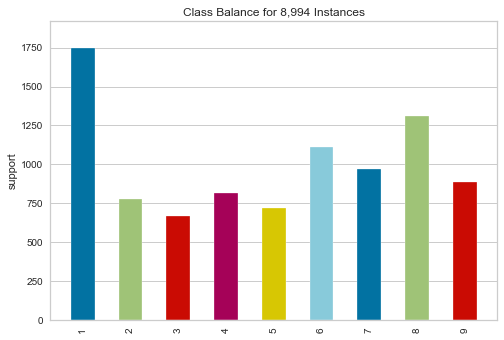

In [83]:
from yellowbrick.target import ClassBalance
# labels=["1", "8", "6", '7','9','4','2','5','3','Miss']
visualizer = ClassBalance()
visualizer.fit(y)
plt.xticks(rotation=90)
visualizer.poof()

In [84]:
sm = SMOTE(random_state=42)
X, y = sm.fit_sample(X, y)

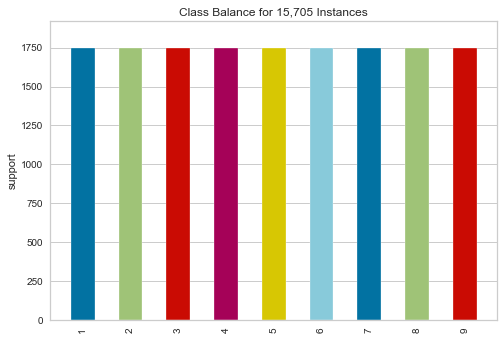

In [85]:
from yellowbrick.target import ClassBalance
visualizer = ClassBalance()
visualizer.fit(y)
plt.xticks(rotation=90)
visualizer.poof()

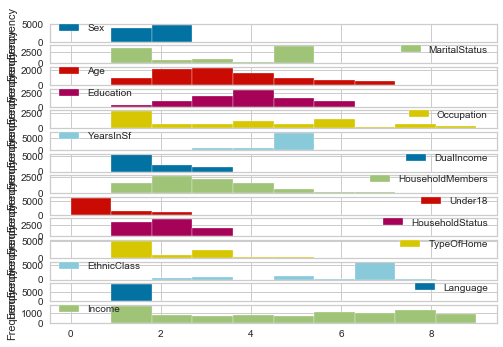

In [86]:
mrkR.plot(kind='hist', bins=10, subplots=True);

## BoxPlot

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

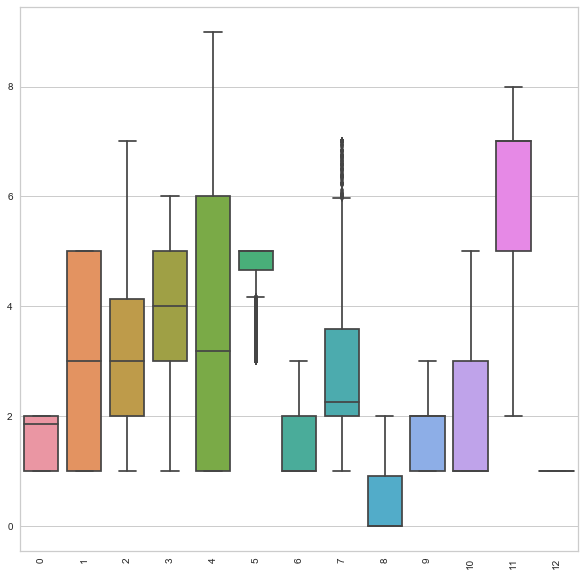

In [87]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=X)
plt.xticks(rotation=90)

## Learning

In [88]:
from sklearn.preprocessing import StandardScaler

X = np.array(X)
y = np.array(y)

# scaling
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    shuffle=True, random_state=42)

In [90]:
from sklearn.svm import SVC

# learning
kernel = ['linear', 'rbf', 'poly']
clf = []

for i in kernel:
    svm = SVC(C=1.0, gamma='auto', kernel=i, random_state=42)
    clf.append(svm.fit(X_train, y_train))

## Evaluate

In [91]:
from sklearn import metrics

In [92]:
def calc_metrics(y_test, y_pred):
    pre = metrics.precision_score(y_test, y_pred, average='micro')
    recall = metrics.recall_score(y_test, y_pred, average='micro')
    acc = metrics.accuracy_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred, average='micro')
    metrics_list = [pre, recall, acc, f1]
    
    return metrics_list

In [93]:
result = []

for i in range(len(clf)):
    y_pred = clf[i].predict(X_test)
    result.append(calc_metrics(y_test, y_pred))

In [94]:
result_df = pd.DataFrame(result, columns=['Precision', 'Recall', 'Acc', 'F-score'])
result_df = result_df.assign(Kernel=kernel)
result_df = result_df[['Kernel', 'Precision', 'Recall', 'Acc', 'F-score']]
round(result_df, 3)

,Kernel,Precision,Recall,Acc,F-score
0,linear,0.268,0.268,0.268,0.268
1,rbf,0.367,0.367,0.367,0.367
2,poly,0.344,0.344,0.344,0.344


In [95]:
result_mlt = pd.melt(result_df, id_vars='Kernel', var_name='Metrics', value_name='values')
result_mlt

,Kernel,Metrics,values
0,linear,Precision,0.268386
1,rbf,Precision,0.367240
2,poly,Precision,0.343840
3,linear,Recall,0.268386
4,rbf,Recall,0.367240
5,poly,Recall,0.343840
6,linear,Acc,0.268386
7,rbf,Acc,0.367240
8,poly,Acc,0.343840
9,linear,F-score,0.268386


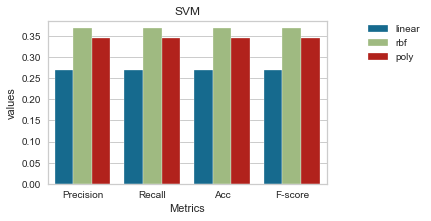

In [96]:
plt.figure(figsize=(5, 3))
sns.barplot(x='Metrics', y='values', hue='Kernel', data=result_mlt)
plt.title('SVM')
plt.legend(loc='best', bbox_to_anchor=(1.35, 1), borderaxespad=0)

## Grid Search

In [97]:
from sklearn.model_selection import GridSearchCV

In [98]:
tuning_parm = [
    {'C': [1, 10, 100], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf']},
    {'C': [1, 10, 100], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['poly']},
]

clf = GridSearchCV(SVC(), tuning_parm, cv=5, scoring='f1_micro', return_train_score=True)

In [99]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [1, 10, 100], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf']}, {'C': [1, 10, 100], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['poly']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1_micro', verbose=0)

In [100]:
grid_df = pd.DataFrame.from_dict(clf.cv_results_)
col = ['mean_train_score', 'params']
grid_df = grid_df[col]
grid_df.sort_values(by=['mean_train_score'], ascending=False)

,mean_train_score,params
6,0.853657,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}"
3,0.671310,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}"
15,0.634645,"{'C': 100, 'gamma': 0.1, 'kernel': 'poly'}"
12,0.560277,"{'C': 10, 'gamma': 0.1, 'kernel': 'poly'}"
0,0.466890,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}"
9,0.461000,"{'C': 1, 'gamma': 0.1, 'kernel': 'poly'}"
7,0.417224,"{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}"
4,0.361483,"{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}"
16,0.349730,"{'C': 100, 'gamma': 0.01, 'kernel': 'poly'}"
8,0.318370,"{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}"


In [101]:
svc = SVC()
# 交差検証
scores = cross_val_score(svc, X, y, cv=7)
print('Cross-Validation scores: {}'.format(scores))
print('Average score: {}'.format(np.mean(scores)))

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

Cross-Validation scores: [0.33155556 0.33822222 0.34091923 0.389112   0.39937528 0.43239625
 0.42213298]
Average score: 0.37910193153566646


## Logistic Regression

## K-NN

In [102]:
from sklearn.preprocessing import StandardScaler

X = np.array(X)
y = np.array(y)

# scaling
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    shuffle=True, random_state=42)

In [104]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(X_train, y_train)                 
y_pred = knn.predict(X_test) 

In [105]:
metrics.accuracy_score(y_test, y_pred)

0.4525628780643107

In [106]:
accuracy = []
for k in range(1, 90):
    knn = KNeighborsClassifier(n_neighbors=k) # インスタンス生成。
    knn.fit(X_train, y_train)                 # モデル作成実行
    y_pred = knn.predict(X_test)              # 予測実行
    accuracy.append(metrics.accuracy_score(y_test, y_pred)) # 精度格納

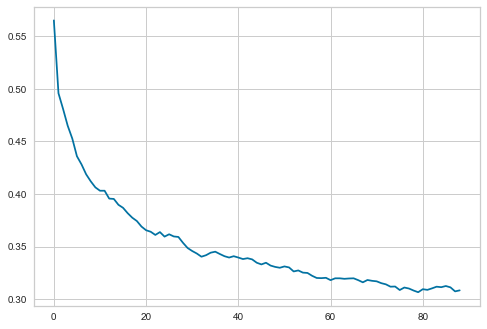

In [107]:
plt.plot(accuracy)

## Decision Tree

In [108]:
from sklearn.preprocessing import StandardScaler
from sklearn import tree

X = np.array(X)
y = np.array(y)

# scaling
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    shuffle=True, random_state=42)

In [110]:
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train,y_train)

In [111]:
predicted = clf.predict(X_train)
predicted

array([6, 2, 2, ..., 9, 7, 1])

In [112]:
sum(predicted == y_train) / len(X_train)

0.2492836676217765

In [113]:
mrkR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8994 entries, 0 to 8993
Data columns (total 14 columns):
Sex                 8994 non-null float64
MaritalStatus       8994 non-null float64
Age                 8994 non-null float64
Education           8994 non-null float64
Occupation          8994 non-null float64
YearsInSf           8994 non-null float64
DualIncome          8994 non-null float64
HouseholdMembers    8994 non-null float64
Under18             8994 non-null float64
HouseholdStatus     8994 non-null float64
TypeOfHome          8994 non-null float64
EthnicClass         8994 non-null float64
Language            8994 non-null float64
Income              8994 non-null float64
dtypes: float64(14)
memory usage: 983.8 KB


In [116]:
tree.export_graphviz(clf, out_file="market.dot",
                         feature_names=X,
                         class_names=y,
                         filled=True, rounded=True)

ValueError: Length of feature_names, 15705 does not match number of features, 13